### AR Î™®Ìòï

AR Î™®ÌòïÏúºÎ°ú ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä ÏòàÏ∏°

In [ ]:
# pykrx	ÌïúÍµ≠ Ï£ºÏãùÏãúÏû•(KRX)Ïùò ÏÇºÏÑ±Ï†ÑÏûê ÏùºÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
# AutoReg	ÏûêÍ∏∞ÌöåÍ∑Ä(AR) Î™®ÌòïÏúºÎ°ú Í≥ºÍ±∞ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú ÎØ∏Îûò Í∞íÏùÑ ÏòàÏ∏°Ìï©ÎãàÎã§.
# lags=5	Ïù¥Ï†Ñ 5Ïùº Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏòàÏ∏° (Ï°∞Ï†ï Í∞ÄÎä•)
# RMSE	ÏòàÏ∏° ÏÑ±Îä• ÌèâÍ∞ÄÏö© ÏßÄÌëú (ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå)

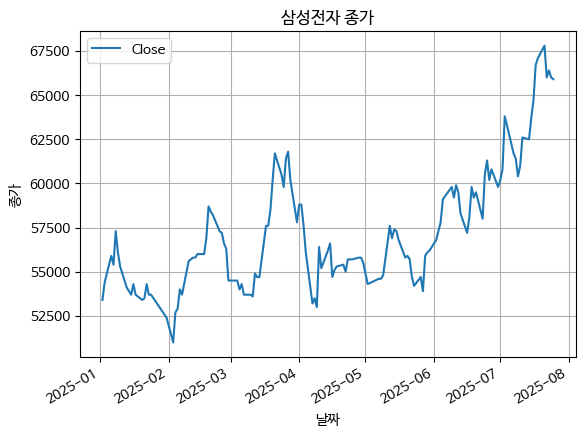

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with

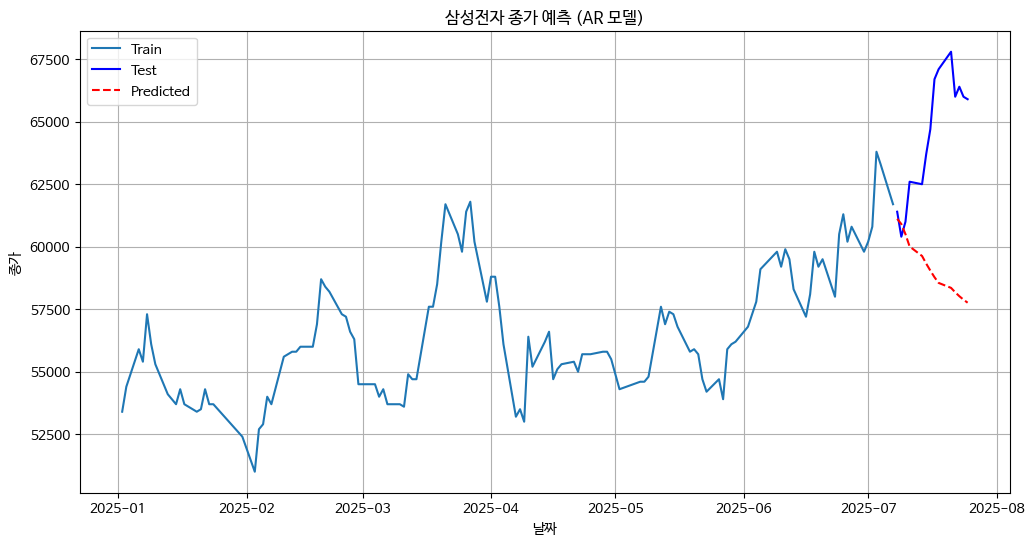

üìå RMSE: 6297.30


C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
from statsmodels.tsa.ar_model import AutoReg
import datetime

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞ (2025ÎÖÑ Ïù¥ÌõÑ)
start = datetime.datetime(2025, 1, 1)
end = datetime.datetime.today()

df = stock.get_market_ohlcv_by_date(start.strftime('%Y%m%d'), end.strftime('%Y%m%d'), "005930")  # ÏÇºÏÑ±Ï†ÑÏûê
df = df[['Ï¢ÖÍ∞Ä']].rename(columns={'Ï¢ÖÍ∞Ä': 'Close'})

# 2.  Ï¢ÖÍ∞Ä ÏãúÍ≥ÑÏó¥ ÏãúÍ∞ÅÌôî
df.plot(title='ÏÇºÏÑ±Ï†ÑÏûê Ï¢ÖÍ∞Ä')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Ï¢ÖÍ∞Ä')
plt.grid(True)
plt.show()

# 3. AR Î™®Ìòï ÌïôÏäµ
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌïôÏäµÏö© 90%, ÌÖåÏä§Ìä∏Ïö© 10%)
# .ilocÎäî Ìñâ Î≤àÌò∏ Í∏∞Ï§Ä Ïä¨ÎùºÏù¥Ïã±

train_size = int(len(df) * 0.9)  # len(df) * 0.9 ‚Üí Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò 90%Ïóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§ ÏúÑÏπò
train, test = df.iloc[:train_size], df.iloc[train_size:]

# AR Î™®Îç∏ Ï†ÅÌï©
# old_names=False	ÏÉàÎ°úÏö¥ statsmodels Î≤ÑÏ†ÑÏóê ÎßûÎäî ÎÇ¥Î∂Ä Î≥ÄÏàòÎ™Ö ÏÇ¨Ïö© (Í∂åÏû•)
model = AutoReg(train['Close'], lags=5, old_names=False) # AR(5) Î™®Ìòï: Ïù¥Ï†Ñ 5ÏùºÍ∞Ñ Ï¢ÖÍ∞ÄÎ•º Ïù¥Ïö©Ìï¥ Îã§Ïùå ÎÇ† ÏòàÏ∏°
model_fit = model.fit()

# 4. ÏòàÏ∏°
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
test['Predicted'] = predictions.values

# 5. Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test', color='blue')
plt.plot(test.index, test['Predicted'], label='Predicted', color='red', linestyle='--')
plt.title('ÏÇºÏÑ±Ï†ÑÏûê Ï¢ÖÍ∞Ä ÏòàÏ∏° (AR Î™®Îç∏)')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Ï¢ÖÍ∞Ä')
plt.legend()
plt.grid(True)
plt.show()

# 6. Í∞ÑÎã®Ìïú ÌèâÍ∞Ä ÏßÄÌëú
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test['Close'], test['Predicted'], squared=False)
print(f"üìå RMSE: {rmse:.2f}")


## Ìñ•ÌõÑ 10Ïùº ÏòàÏ∏° Ïà´Ïûê Ï∂úÎ†• Ï∂îÍ∞Ä

In [9]:
# 7. Ìñ•ÌõÑ 10Ïùº ÏòàÏ∏°
future_days = 10
future_predictions = model_fit.predict(
    start=len(df),
    end=len(df) + future_days - 1,
    dynamic=False
)

# ÎÇ†Ïßú ÏÉùÏÑ± (ÌèâÏùº Í∏∞Ï§Ä)
last_date = df.index[-1]
future_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='B')

# Í≤∞Í≥º DataFrame Ï†ïÎ¶¨
future_df = pd.DataFrame({'ÏòàÏ∏° Ï¢ÖÍ∞Ä': future_predictions.values}, index=future_index)

# 8. ÏòàÏ∏° Ïà´Ïûê Ï∂úÎ†•
print("\nüìÖ Ìñ•ÌõÑ ÏÇºÏÑ±Ï†ÑÏûê Ï¢ÖÍ∞Ä ÏòàÏ∏° (AR Î™®Îç∏):")
print(future_df.round(2))



üìÖ Ìñ•ÌõÑ ÏÇºÏÑ±Ï†ÑÏûê Ï¢ÖÍ∞Ä ÏòàÏ∏° (AR Î™®Îç∏):
               ÏòàÏ∏° Ï¢ÖÍ∞Ä
2025-07-28  57653.55
2025-07-29  57558.73
2025-07-30  57475.09
2025-07-31  57401.33
2025-08-01  57336.27
2025-08-04  57278.87
2025-08-05  57228.25
2025-08-06  57183.60
2025-08-07  57144.21
2025-08-08  57109.48


C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Ï∞®Î∂ÑÎêú Îç∞Ïù¥ÌÑ∞Î°ú ARIMA Ï†ÅÏö©

In [10]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# ARIMA(p,d,q)ÏóêÏÑú d=1Î°ú Ï∞®Î∂Ñ
auto_model = auto_arima(df['Close'], seasonal=False, trace=True)
best_order = auto_model.order  # Ïòà: (1,1,0)

# statsmodelsÎ°ú Î™®Îç∏ Ïû¨Ï†ÅÌï©
model = ARIMA(df['Close'], order=best_order)
fit = model.fit()
future_pred = fit.get_forecast(steps=10)
predicted_mean = future_pred.predicted_mean

# ÏòàÏ∏° Í≤∞Í≥º ÌôïÏù∏
print(predicted_mean.round(2))


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2294.060, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2292.048, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2293.508, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2293.566, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2291.017, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2295.184, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.822 seconds
137    65900.0
138    65900.0
139    65900.0
140    65900.0
141    65900.0
142    65900.0
143    65900.0
144    65900.0
145    65900.0
146    65900.0
Name: predicted_mean, dtype: float64


C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

ÏÇºÏÑ±Ï†ÑÏûê ÏùºÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Ï£ºÍ∞Ñ/ÏõîÍ∞Ñ Îã®ÏúÑÎ°ú Î¶¨ÏÉòÌîåÎßÅ

In [ ]:
# resample(rule='W')	'W': Ï£ºÍ∞Ñ, 'M': ÏõîÍ∞Ñ Ï¢ÖÍ∞Ä Í∏∞Ï§Ä
# AutoReg	AR(lags=4) Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÎØ∏Îûò ÏòàÏ∏°
# get_prediction()	ÏòàÏ∏°Í∞íÍ≥º Ïã†Î¢∞Íµ¨Í∞Ñ(confidence interval) Ìï®Íªò Ï∂úÎ†•
# fill_between()	ÏòàÏ∏° Íµ¨Í∞ÑÏùÑ Í∑∏Î¶ºÏûê ÏòÅÏó≠ÏúºÎ°ú ÏãúÍ∞ÅÌôî
# RMSE	Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÎπÑÍµêÎ•º ÏúÑÌïú ÏßÄÌëú

C:\Users\JYB\AppData\Local\Temp\ipykernel_4400\3669392138.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data['Close'].resample(rule).last()


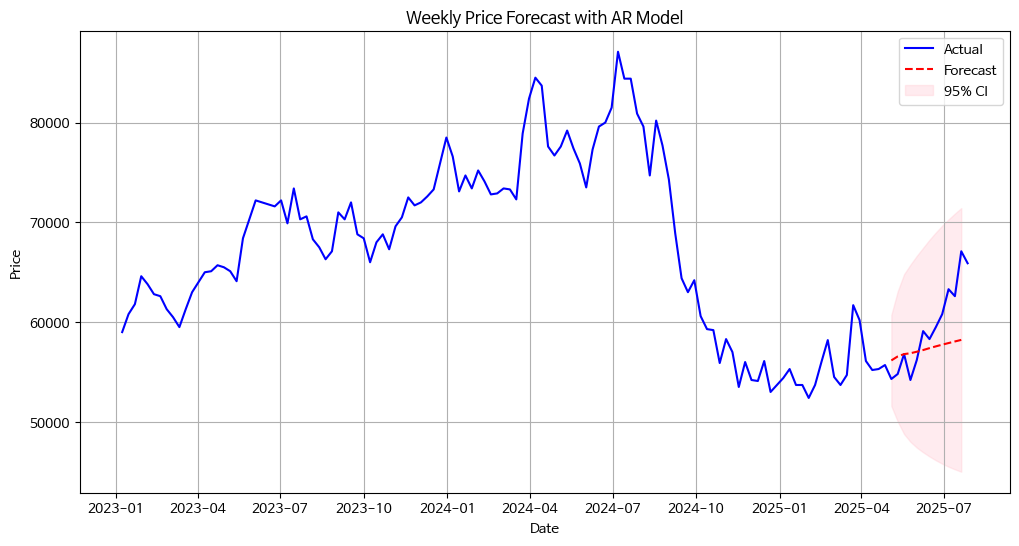

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Weekly RMSE: 2580.14


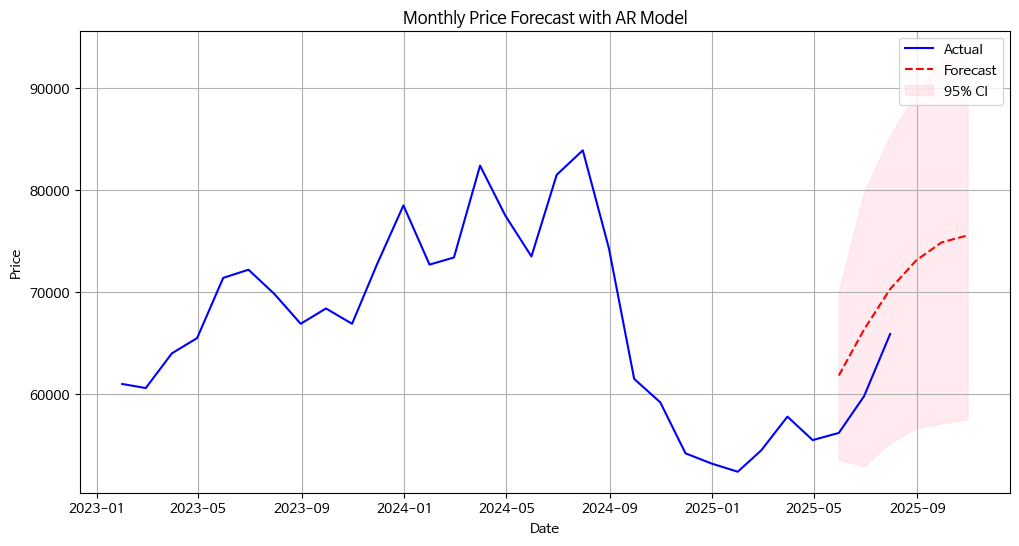

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [4, 6]

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
from statsmodels.tsa.ar_model import AutoReg
import datetime
from sklearn.metrics import mean_squared_error

# üì• 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime.today()

df = stock.get_market_ohlcv_by_date(start.strftime('%Y%m%d'), end.strftime('%Y%m%d'), "005930")
df = df[['Ï¢ÖÍ∞Ä']].rename(columns={'Ï¢ÖÍ∞Ä': 'Close'})

# üìÜ 2. Ï£ºÍ∞Ñ/ÏõîÍ∞Ñ Î¶¨ÏÉòÌîåÎßÅ Ìï®Ïàò
def resample_price(data, rule='W'):
    return data['Close'].resample(rule).last()

df.index = pd.to_datetime(df.index)
weekly_data = resample_price(df, 'W')   # 'W' ‚Üí Ï£ºÍ∞Ñ
monthly_data = resample_price(df, 'M')  # 'M' ‚Üí ÏõîÍ∞Ñ

# üîÅ 3. ÏòàÏ∏° Ìï®Ïàò Ï†ïÏùò
def forecast_AR_model(ts, lags=4, forecast_steps=10, label='Weekly'):
    train_size = int(len(ts) * 0.9)
    train, test = ts[:train_size], ts[train_size:]

    model = AutoReg(train, lags=lags, old_names=False)
    model_fit = model.fit()

    # ÏòàÏ∏°Í∞í Î∞è ÏòàÏ∏° Íµ¨Í∞Ñ Í≥ÑÏÇ∞
    pred = model_fit.get_prediction(start=train_size, end=train_size + forecast_steps - 1, dynamic=False)
    pred_mean = pred.predicted_mean
    ci = pred.conf_int(alpha=0.05)  # 95% Ïã†Î¢∞Íµ¨Í∞Ñ

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    plt.plot(ts.index, ts, label='Actual', color='blue')
    future_index = pd.date_range(ts.index[train_size], periods=forecast_steps + 1, freq=ts.index.freq or 'W')[1:]
    plt.plot(future_index, pred_mean, label='Forecast', color='red', linestyle='--')
    plt.fill_between(future_index, ci.iloc[:, 0], ci.iloc[:, 1], color='pink', alpha=0.3, label='95% CI')
    plt.title(f'{label} Price Forecast with AR Model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    rmse = mean_squared_error(ts[train_size:train_size + forecast_steps], pred_mean, squared=False)
    print(f"{label} RMSE: {rmse:.2f}")

# üìà 4. ÏòàÏ∏° Ïã§Ìñâ
forecast_AR_model(weekly_data, lags=4, forecast_steps=12, label='Weekly')    # 12Ï£º ÏòàÏ∏°
forecast_AR_model(monthly_data, lags=4, forecast_steps=6, label='Monthly')   # 6Í∞úÏõî ÏòàÏ∏°


In [ ]:
# ÏòàÏ∏° Í≤∞Í≥º ÏòàÏãú (Í∑∏ÎûòÌîÑ ÌòïÌÉú)
# ÌååÎûÄ ÏÑ†: Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞
# Îπ®Í∞Ñ Ï†êÏÑ†: ÏòàÏ∏° Í∞í
# Î∂ÑÌôç Í∑∏Î¶ºÏûê: 95% ÏòàÏ∏° Ïã†Î¢∞ Íµ¨Í∞Ñ